In [1]:
from model.model import EVSpaceModel
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
import numpy as np

In [2]:
CP_loc='inputs/Mississauga_charging_stations.csv'
POI_file = 'inputs/Mississauga_poi_data.csv'
speed = 0.3

model = EVSpaceModel()#ChargeP_CP_loc=CP_loc,ModelP_POI_file=POI_file)  
model.run_model(100) #24*365   

In [3]:
mdf = model.datacollector.get_model_vars_dataframe()
adf = model.datacollector.get_agent_vars_dataframe()
# adf.to_csv('xx.csv')
mdf.to_csv('data/mdf.csv')
adf.to_csv('data/adf.csv')

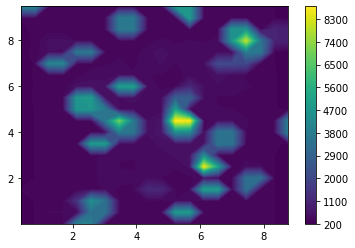

In [4]:
GP = model.datacollector_gridpoints.get_agent_vars_dataframe()
# XY = pd.DataFrame(GP['pos'].tolist()).rename({0:'X',1:'Y'},axis=1)

grid_spacing = model.cfg['agent_params']['Grid_Points']['grid_spacing']

GP_tot = GP.reset_index().groupby('AgentID').agg({'cars_passing':sum,'X':'first','Y':'first'})
# fig, ax = plt.subplots()
# sns.scatterplot(data=GP_tot, x='X',y='Y',c=GP_tot['cars_passing'])

X = GP_tot['X'].values.reshape((-1,grid_spacing))
Y = GP_tot['Y'].values.reshape((-1,grid_spacing))
Z = GP_tot['cars_passing'].values.reshape((-1,grid_spacing))

fig, ax = plt.subplots()
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cs = ax.contourf(X, Y, Z, 100)
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cbar = plt.colorbar(cs)


In [5]:
mdf

,av_charge,completed_trip,dead_cars,charge_load,date_time,av_moving,av_home,av_work,av_random
0,0.746192,0,0.000,0.00000,2022-01-01 00:00:00,0.000,0.691,0.092,0.217
1,0.785342,0,0.000,0.03915,2022-01-01 01:00:00,0.000,0.691,0.092,0.217
2,0.817342,2,0.000,0.03915,2022-01-01 02:00:00,0.013,0.693,0.092,0.202
3,0.835142,5,0.000,0.03925,2022-01-01 03:00:00,0.061,0.697,0.093,0.149
4,0.833492,38,0.003,0.03950,2022-01-01 04:00:00,0.106,0.732,0.096,0.064
...,...,...,...,...,...,...,...,...,...
96,0.734042,86,0.016,0.07955,2022-01-05 00:00:00,0.097,0.516,0.172,0.078
97,0.739392,75,0.014,0.07850,2022-01-05 01:00:00,0.108,0.518,0.159,0.089
98,0.737092,77,0.011,0.07805,2022-01-05 02:00:00,0.126,0.517,0.147,0.094
99,0.725792,101,0.012,0.07745,2022-01-05 03:00:00,0.136,0.505,0.149,0.108


,av_charge,completed_trip,dead_cars,charge_load,av_moving,av_home,av_work,av_random
hour,,,,,,,,
0,0.733782,71.20,0.01300,0.065200,0.07740,0.55900,0.13620,0.11720
1,0.745502,65.20,0.01220,0.072160,0.08020,0.56900,0.12420,0.12300
2,0.751122,60.80,0.01060,0.071440,0.09440,0.57280,0.11820,0.12160
3,0.748022,71.20,0.00920,0.070800,0.11480,0.56380,0.11880,0.11760
4,0.738582,79.40,0.01220,0.069920,0.12980,0.56020,0.12340,0.10460
5,0.732817,96.75,0.01450,0.067563,0.11450,0.56275,0.14100,0.09675
6,0.729205,91.00,0.01400,0.068400,0.09525,0.54275,0.16975,0.10425
7,0.727455,89.50,0.01550,0.068675,0.08400,0.50800,0.21175,0.10325
8,0.730967,80.75,0.01525,0.069550,0.07575,0.48225,0.24100,0.10575


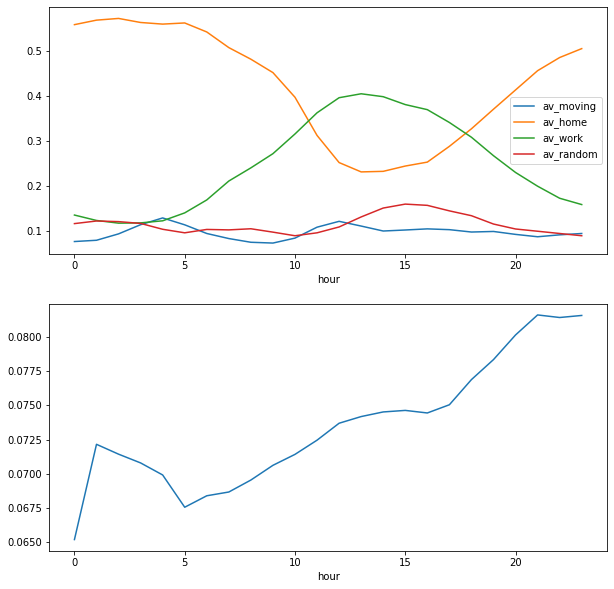

In [6]:
import pandas as pd
mdf['hour'] = pd.to_datetime(mdf.date_time).dt.hour
hourly = mdf.groupby('hour').mean()

fig, ax = plt.subplots(2, figsize=(10,10))
hourly[['av_moving','av_home','av_work','av_random']].plot(ax=ax[0])
hourly['charge_load'].plot(ax=ax[1])
hourly